In [1]:
import numpy as np
def arrayIndexes(shape):
    """
    Get the index of each element of an n-dimensional array. Each index is returned
    as a tuple of integers, with the last dimension being iterated over fastest.
    This function has similar behaviour to 'list(np.ndindex(shape))'. The
    difference is that 'arrayIndexes' uses negative integers for the second half of
    each dimension.
    This helps to avoid issues when dealing with neighbours
    (no need to use a cycler or a remainder).

    :param shape: a tuple of integers; the shape of an n-dimensional array.
    :return: A list of tuples of integers. The list will contain 'np.prod(shape)' tuples
    and each tuple will contain 'len(shape)' integers.
    """

    # each line has a comment afterwards showing what is created
    # specifically for 'shape = (3, 4, 5)'

    x = [
        np.concatenate((
            np.arange(0, (n + 1) // 2),
            np.arange(-(n - 1) // 2, 0)
        ))
        for n in shape
    ]
    # [array([ 0,  1, -1]), array([ 0,  1, -2, -1]), array([ 0,  1,  2, -2, -1])]

    # each element of the above arrays must be repeated 'each' times
    each = np.cumprod((1,) + shape[:0:-1])[::-1]
    # array([20,  5,  1])

    # after repeating the array with 'each',
    # the entire array must be repeated 'times' times
    times = np.prod(shape) // (shape * each)
    # array([ 1,  3, 12])

    return list(zip(*[
        np.concatenate([xx.repeat(eeach)] * ttimes)
        for xx, eeach, ttimes in zip(x, each, times)
    ]))
    
def evolve(self, updates_per_cell=1):
    """
    Evolve the state of a cellular automata.
    'evolve' will sequentially update each cell (lexically ordered), and will
    update the lattice 'updates_per_cell' number of times.
    :param updates_per_cell: number of times to update each cell while updating the whole lattice.
    """
    upd = self.update
    emp = self.empty_fun()

    new = self.city.lattice
    indexes = self.arrayIndexes(new.shape)
    for _ in range(updates_per_cell):
        old = new
        new = emp()
        for idx in indexes:
            upd(old, new, idx)
    return

def empty_fun(self):
    row = self.mould_shape[0]
    col = self.mould_shape[1]
    if self.mould_shape[0] < self.city.lattice.shape[0] - 50:
        row += 50
    if self.mould_shape[1] < self.city.lattice.shape[1] - 50:
        col += 50
    return lambda: np.empty((row, col), object)

In [2]:
a = np.array([[11,22,33], [44,55,66], [77,88,99]])
b = np.array([[11,22,33], [44,55,66], [77,88,99], [23, 34, 45]])
a.shape

(3, 3)

In [3]:
x = arrayIndexes((2,2))
for i in x:
    print(b[i])

11
33
23
45


In [4]:
for i in np.ndindex((2,2)):
    print(b[i])

11
22
44
55


In [5]:
(3,3) in (4,4)

False

In [6]:
a[(1,1),(2,2)]

array([66, 66])

In [7]:
class Test:
    def __init__(self) -> None:
        pass

class Test2:
    def __init__(self) -> None:
        pass
test = Test()

isinstance(test, Test2)

False

In [8]:
import collections
goal = "g"
grid = ["12345",
        "67890",
        "qwert",
        "asdfg",
        "zxcvb"]
width, height = 5, 5
def bfs(grid, start):
    queue = collections.deque([[start]])
    seen = set([start])
    while queue:
        path = queue.popleft()
        x, y = path[-1]
        if grid[x][y] == goal:
            return path
        for x2, y2 in ((x-1,y-1), (x+1,y-1), (x-1,y+1), (x+1,y+1), (x-1, y), (x+1, y), (x, y-1), (x, y+1)):
            if 0 <= x2 < width and 0 <= y2 < height and (x2, y2) not in seen:
                queue.append(path + [(x2, y2)])
                seen.add((x2, y2))

path = bfs(grid, (0, 0))
path

[(0, 0), (1, 1), (2, 2), (3, 3), (3, 4)]

In [9]:
# a = [[1,1],[2,2], [3,3]]
a = np.empty((5,5))
a = np.zeros_like(a)

In [10]:
a[(1,1)] = 1

In [11]:
a[(2,1)] = 1
a

array([[0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

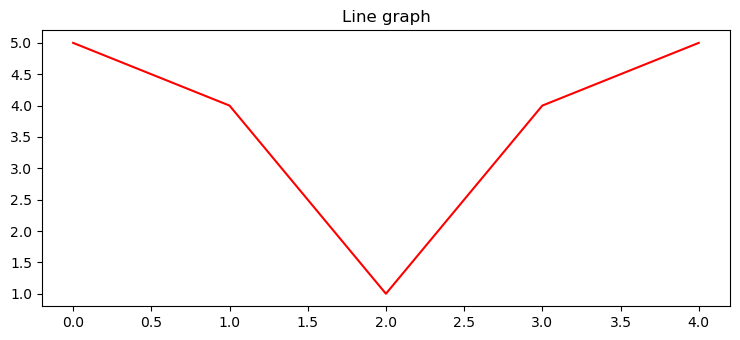

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = [5, 4, 1, 4, 5]


plt.title("Line graph")
plt.plot(x, color="red")

plt.show()